
# 4. Evaluación y elección de la mejor segmentación

Una gran empresa de comercio electrónico se está preparando para su mayor evento del año. La empresa es ambiciosa en sus objetivos y pretende lograr las mejores cifras de ventas hasta el momento. **Para que esas campañas sean más efectivas, es fundamental comprender a los clientes y elegir el mensaje adecuado para ellos**.

En tal situación, una segmentación de clientes bien realizada puede marcar la diferencia y ayudar a maximizar el ROI (retorno de la inversión) del marketing.

Al analizar los segmentos de clientes, el equipo de marketing puede definir la estrategias para cada segmento.

- ¿Cómo se debe decidir el número de segmentos?
- ¿Cómo evaluamos la robustez de los segmentos? 

Como analista, también exploraremos técnicas alternativas de ML para la agrupación que puedan ser más adecuadas para la naturaleza de los datos. 

- ¿Qué pasa si la mayoría de las características son características categóricas?

En el capítulo anterior, vimos el concepto de agrupamiento y lo practicamos usando el agrupamiento de k-means, un enfoque simple y para el agrupamiento que divide los puntos de datos en un número predeterminado de clusters. 

Creamos una cantidad predeterminada de clusters, asumiendo que teníamos la cantidad correcta de clusters, ya sea por intuición o por restricciones comerciales. Además, para evaluar los clusters resultantes, utilizamos una perspectiva comercial.

Para completar la comprensión de la agrupación en clústeres debemos poder responder las siguientes preguntas para cualquier ejercicio de segmentación:

- ¿Cómo elegimos el número de clusters?
- ¿Cómo evaluamos los clusters estadísticamente/numéricamente?
- ¿Cuál es el mejor algoritmo de clustering para la tarea?

En este capítulo, revisaremos las consideraciones para hacer una elección.

1. Para elegir el **número correcto de clústeres**, además de las consideraciones de neogcio, revisaremos tres enfoques diferentes para llegar estadísticamente a un número. 

Se explorará métodos sin especificación previamente el número deseado de clústeres.

Hasta ahora, solo hemos trabajado con datos que son fáciles de manejar para k-means: variables continuas o variables binarias. 


En este capítulo, explicaremos cómo manejar datos que contienen variables 
- **categóricas** con muchos valores posibles diferentes, 
utilizando los métodos de agrupación en clústeres **k-mode** y **k-prototype**.

Finalmente, evaluaremos si un método de agrupamiento es mejor que otro. 

Para este propósito, vamos a **modificar los hiperparámetros** de un algoritmo de modelado y veremos de  si eso resultó a una mejor agrupación, para poder comparar los diferentes tipos de algoritmos.

# 4.1 Elección del número de clústeres
En el capítulo anterior especificamos el número de clusters al algoritmo k-means. Sin embargo, **normalmente no sabemos la cantidad de grupos** que se esperan en los datos. 

Por ejemplo, una empresa puede tener la intuición de que generalmente hay tres tipos de clientes. Pero un análisis de los datos puede apuntar a cinco grupos distintos de clientes. 

Las características que elegimos y la escala de esas características también juegan un papel importante en la definición de **similitud** entre los clientes.

Enforquesd para la elección del número de clusters 

1. La inspección visual simple, que tiene las ventajas de ser fácil e intuitiva, pero depende en gran medida del juicio y la subjetividad individuales. 

2. El método del Elbow con la suma de los errores al cuadrado, que es parcialmente cuantitativo pero aún se basa en el juicio individual. 

3. El uso de Score de la silueta, que elimina la subjetividad del juicio, pero no es una métrica muy intuitiva.

Hay un principio primordial que siempre debe tener en cuenta: las **medidas cuantitativas** solo le indican qué tan bien se ajusta esa cantidad de grupos a los datos. No le dicen cuán útiles son esos clústeres para los negocios. 

Los clústeres, por muy buenos que sean estadísticamente, son inútiles si la empresa no los puede accionar (actionable). Hay dos formas en que los clústeres pueden resultar no procesables:

- Los clústeres no tienen sentido de negocio
- Son demasiados clusters

Los clústeres deben ser interpretables por la empresa para que sean procesables (actionable). Por ejemplo, para que las campañas de marketing sean más efectivas, debe comprender bien la naturaleza de los grupos y lo que le importa a cada grupo para que los mensajes se puedan ajustar en consecuencia. 

En cuanto a la cantidad de clústeres, no es práctico crear una estrategia de marketing diferencial o **experiencia del cliente para 30 clústeres diferentes**. A menudo, existe un límite superior para la cantidad de clústeres que es práctico para que una empresa actúe.

El uso de menos clusterss y menos variables a menudo puede conducir a clusters más fáciles de interpretar. En general, los datos del mundo real son bastante confusos. 

Aprender acerca de estos métodos lo ayudará a saber qué tan buenos son los clústeres mientras se asegura de que los métodos en sí están bien fundamentados. **Pero tenga en cuenta que son sólo un factor**. Desde una perspectiva cuantitativa, la diferencia entre elegir cuatro grupos y cinco puede ser pequeña y, en ese punto, debe estar preparado para usar su criterio para decidir qué es lo mejor.

## Ejercicio 4.01: Puesta en escena y visualización de datos


Un centro comercial desea rediseñar sus ofertas y comunicaciones de marketing existentes para **mejorar** las ventas en uno de sus mercados clave. 

El objetivo de este ejercicio es cargar los datos y realizar una limpieza básica para que pueda usarlos en otras tareas. Además, visualizar los datos para comprender mejor cómo se distribuyen los clientes en dos atributos clave: 
- Income y 
- Spend_score. 

Se usarán estos campos más adelante para realizar agrupamiento.

1. Importar las bibliotecas pandas, numpy, matplotlib y seaborn y cargar los datos de los clientes del centro comercial desde el archivo `Mall_Customers.csv` en un DataFrame `mall0` e imprimir los cinco registros principales

In [30]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns

!curl https://raw.githubusercontent.com/limspiga/customer-analytics/main/week-2a/datasets/Mall_Customers.csv -O

mall0 = pd.read_csv("Mall_Customers.csv") 
mall0.head()

# Vemos que tenemos información como el Gender y Age de clientes, 
# junto con su ingreso anual estimado (Ingreso Anual (k$)). 

# También tenemos una spending score calculada por el centro comercial 
# (Spending Score (1-100)), un score basado en percentiles que denotan el alcance 
# de las compras que el cliente ha realizado en el centro comercial: 
# una puntuación más alta significa un mayor gasto (el que más gasta obtiene una puntuación de 100 ).


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3780  100  3780    0     0  28636      0 --:--:-- --:--:-- --:--:-- 28636


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


2. Cambiar el nombre de las columnas 'Annual Income (k$)' y
'Spending Score (1-100)' a 'Income' y 'Spend_score' respectivamente.

In [31]:
mall0.rename({'Annual Income (k$)':'Income',  'Spending Score (1-100)':'Spend_score'},
             axis=1, inplace=True)
mall0.head()

,CustomerID,Gender,Age,Income,Spend_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


3. Graficamos un diagrama de dispersión de los campos `Income` y `Spend_score` utilizando el siguiente código. 


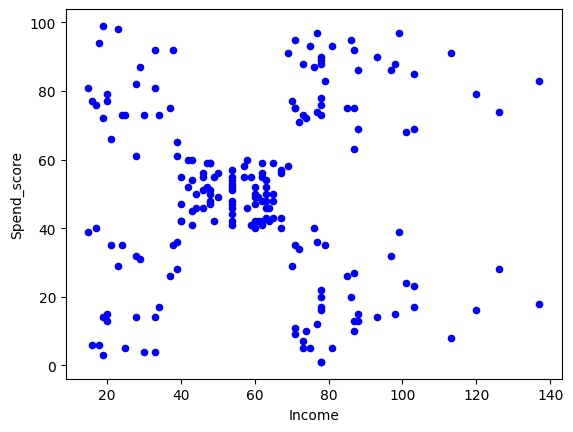

In [32]:
# Nota: Realizará la agrupación en clustering más adelante utilizando 
# estas dos funciones como criterio.

mall0.plot.scatter(x='Income', y='Spend_score', color='blue')

plt.show()

# La visualización de los datos proporciona una buena perspectiva de la 
# distribución y puede darnos una idea de los grupos naturales en los datos. 
# Estos conocimientos pueden mostrarnos los números que elegimos para 
# la actividad de agrupación.

# 4.2 Inspección **visual** simple para elegir el número óptimo de Clusters

Un método intuitivo y directo para elegir el número de grupos es realizar un agrupamiento con un rango de grupos e inspeccionar visualmente los resultados. Por lo general, al observar los datos, puede saber qué tan bien separados están los diferentes grupos.

Los clústeres son mejores cuando:
- **están bien separados**, 
- sin demasiada superposición 
- y cuando capturan las partes más densamente pobladas del espacio de datos. 

En la figura del ejercicio anterior, el grupo en el centro del gráfico, con un puntaje de ingresos y gastos promedio, es un buen grupo compacto ya que los puntos están cerca uno del otro en un área densa. El grupo en la esquina inferior derecha, por otro lado, se extiende delgadamente en un área más grande. En un escenario ideal, solo tendríamos clústeres densos que no se superponen.

La elección del número de clústeres tiene un efecto significativo sobre cómo se asignan los clústeres. **Muy pocos grupos a menudo darán lugar a plots que se ven como una solo clúster que abarca más de un espacio densamente poblado**. 

Por otro lado, demasiados clústeres a menudo parecerán que están compitiendo por un solo espacio densamente poblado. Cuando se trata de más de dos dimensiones, podemos utilizar técnicas de **reducción de dimensionalidad** para permitir la evaluación visual. 


Este no es un método cuantitativo; sin embargo, como deja mucho a la subjetividad y al juicio individual, para muchos problemas simples, es una excelente manera de decidir cuántos clústeres usar.

## Ejercicio 4.02: Elección del número de Clusters en función de la inspección visual

El objetivo del ejercicio es perfeccionar aún más el enfoque de segmentación de clientes mediante la inspección visual para decidir el número óptimo de grupos.

Se probaran diferentes números de grupos (que van de dos a seis) y utilizarás la inspección visual para evaluar los resultados y elegir el número correcto de grupos.

1. Estandarizar las columnas `Age`, `Income` y `Spend_score`, usando `StandardScaler` de sklearn, después de copiar la información en un nuevo conjunto de datos llamado `mall_scaled`.

In [33]:
mall_scaled = mall0.copy()
cols_to_scale = ['Age', 'Income', 'Spend_score']
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Solo estandarizar
mall_scaled[cols_to_scale] = scaler.fit_transform\
                             (mall_scaled[cols_to_scale])

2. Importe el módulo `Kmeans` del paquete sklearn. Crear una lista, `cluster_cols` que almacene los nombres de los campos (`Income` y `Spend_score`). (2) definir los colores y las formas que se usará para cada grupo (ya que visualizará hasta siete grupos en total, definir siete formas diferentes)

In [34]:
from sklearn.cluster import KMeans
cluster_cols = ['Income', 'Spend_score']
markers = ['x', '*', '.', '|', '_', '1', '2']

# Al trazar los clusters obtenidos, los elementos en los clusters estarán 
# representados por los símbolos en la lista en orden. 
# 'x' representará el primer clúster (Cluster 0). 
# Para el agrupamiento final con 7 grupos, 
# se utilizarán todas las formas de la lista y el grupo 6 se representará 
# con el marcador '2' (llamado 'tickup').

3. Luego, usando un bucle `for`, agrupar los datos usando un número diferente de grupos, que van de dos a siete, y visualizar las gráficas resultantes obtenidas en una subparcela. 


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

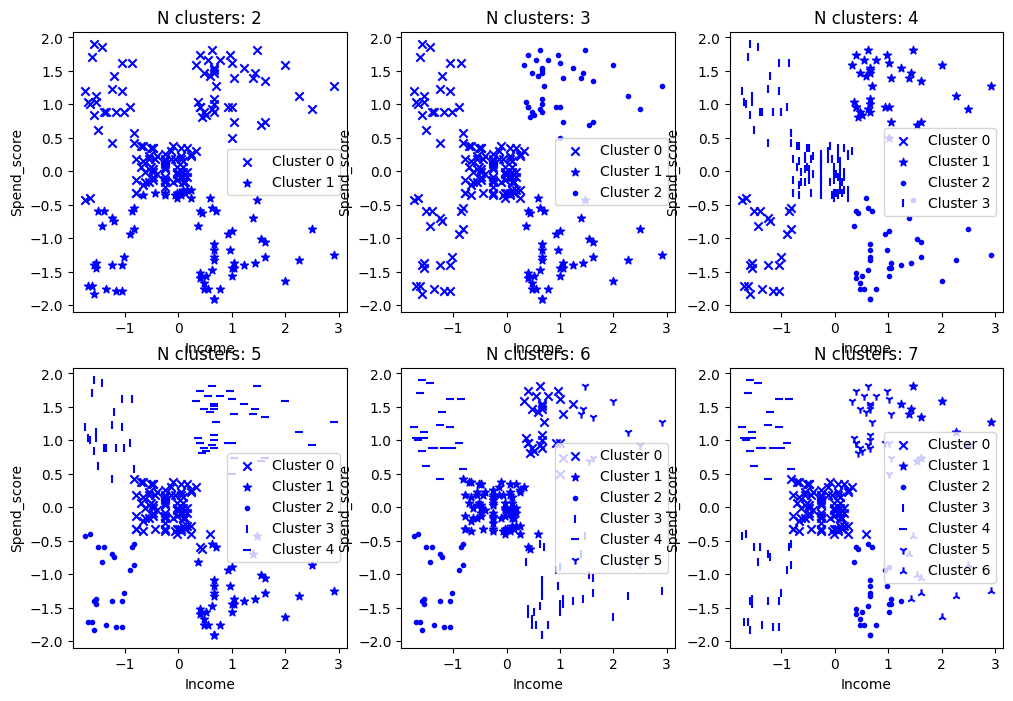

In [35]:
# Usar un bucle for separado para trazar cada grupo en cada subplot, 
# de modo que podamos usar diferentes formas para cada grupo. 
plt.figure(figsize=[12,8])
for n in range(2,8):
    model = KMeans(n_clusters=n, random_state=42) # aquí se va aumentando el numero de clusters en cada iteración
    mall_scaled['Cluster']= model.fit_predict\
                            (mall_scaled[cluster_cols])
    plt.subplot(2,3, n-1)
    for clust in range(n):
        temp = mall_scaled[mall_scaled.Cluster == clust]
        plt.scatter(temp.Income, temp.Spend_score, \
                    marker=markers[clust], \
                    label="Cluster "+ str(clust), color='blue') 
        plt.title("N clusters: "+str(n))
        plt.xlabel('Income')
        plt.ylabel('Spend_score')
        plt.legend()
plt.show()

Al observar los gráficos resultantes, podemos ver que con muy pocos grupos (2, 3 o 4), terminamos con grupos que abarcan regiones dispersas entre regiones más densamente pobladas. 
Por ejemplo, con 3 clústeres, vemos que obtenemos un clúster enorme para clientes de bajos ingresos. Por otro lado, con demasiados (6 o 7), terminamos con grupos que bordean entre sí pero no parecen separados
por una región de escasez. 

5 grupos parecen capturar cosas muy bien con grupos que no se superponen y son bastante densos. 

**5 es, por lo tanto, el número "correcto" de grupos**. 

Esto está en línea con nuestra expectativa que creamos en el Ejercicio 4.01, Puesta en escena y visualización de datos. Este simple método visual es efectivo, pero tenga en cuenta que es completamente subjetivo.

# El método **Elbow** con suma de errores al cuadrado
A menudo, es difícil saber solo con la visualización cuántos grupos se deben usar para resolver un problema en particular. 

Diferentes personas pueden estar en desacuerdo sobre el número
de grupos a utilizar, y puede que no haya una respuesta clara y unánime. 

Con datos dimensionales más altos, hay un problema adicional: técnicas de reducción de dimensionalidad no son perfectos Intentan tomar toda la información en múltiples dimensiones y reducirlo a sólo dos. 

En algunos casos, esto puede funcionar bien, pero a medida que aumenta el número de **dimensiones**, los datos se vuelven más complejos y estos métodos visuales alcanzan rápidamente sus limitaciones. 

Cuando esto sucede, no es fácil determinar a través de una inspección visual cuál es el número correcto de clústeres que se debe usar. En estos casos, a menudo es mejor buscar una medida más cuantitativa. 

Una de esas medidas clásicas es buscar un **codo** en un gráfico de la suma de los errores al cuadrado, también llamado Gráfico de inercia (Inertia Plot).

**La suma de los errores al cuadrado (SSE)**:  

es la suma de los "errores" (la diferencia entre un punto de datos y el centroide de su grupo asignado) para todos los puntos de datos, al cuadrado. Otro término para esto es inercia. Cuanto más *apretados* sean los grupos, más cerca estarán los puntos constituyentes de sus respectivos grupos y menor será el SSE/inercia. La suma de los errores cuadráticos del modelo se puede calcular mediante la siguiente ecuación:

<h1><center>
$ ss = \sum_{k} \sum_{x_i \in k} \left( x_{i}-\mu_{k}\right)^2  $


Figura 4.5: Ecuación para calcular la suma de los errores cuadráticos de los puntos de datos en un conjunto de datos
</center><h1>

Aquí, $\mu_{k}$ es la ubicación del centroide del grupo $k$, y cada $x_i$ es un punto de datos asignado al grupo $k$. Cuando todas las entidades se tratan como un solo grupo, este valor de $SSE$ está en su máximo para el conjunto de datos. 
A medida que aumentamos $k$, deberíamos esperar que la suma de los errores al cuadrado disminuya, ya que hay más centroides. 

En el caso extremo, cuando cada punto es un cluster, el valor $SSE$/inercia es 0, ya que cada punto es el centroide de su propio cluster. En scikit-learn, utilizará el atributo `inertia_` que está disponible después de ajustar un modelo. Por ejemplo, si `model` es el nombre de la instancia de Kmeans que encaja en los datos, extraer e imprimir el $SSE$ es tan simple como el siguiente comando:

In [36]:
print(model.inertia_)

44.91118554999014


Esta intuición ayuda a identificar el número óptimo de clústeres. Cuando SSE/inercia se grafica en diferentes números de grupos, a menudo hay un Elbow en el gráfico, donde la ganancia en términos de reducción de errores parece disminuir para cada nuevo grupo. A continuación se muestra un gráfico de ejemplo en la Figura 4.6.

<figure>
<center><img src='https://drive.google.com/uc?export=view&id=1JnysM16FxWcckkBa4VELSOcJnWc2HVqk' width="800" />
<figcaption>
Figura 4.6: SSE/inercia para diferentes valores de k, con un "Elbow" (punto de inflexión) en k=4</figcaption></center>
</figure>

# Ejercicio 4.03: Determinación del Número de Clusters Usando el Método Elbow
El objetivo es mejorar el enfoque de segmentación de clientes del centro comercial mediante el uso de un método de principios para determinar la cantidad de grupos, de modo que todas las partes interesadas involucradas, incluidos los equipos comerciales, ganen más **confianza** en la solidez del enfoque y los grupos resultantes. 

Pruebe el rango de 2 a 10 para el número de grupos utilizando los datos de edad e ingresos.

1. En los datos de clientes del centro comercial escalados `mall_scaled`, usando las columnas '`Income`' y '`Spend_score`', crear tres clústeres usando el algoritmo KMeans:

In [37]:
from sklearn.cluster import KMeans
K=3
model = KMeans(n_clusters=K, random_state=42)
model.fit(mall_scaled[cluster_cols])

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

2. Una vez que se ajusta el modelo, el SSE/inercia está disponible muy convenientemente en el atributo 'inertia_' del objeto del modelo. 

In [38]:
print(model.inertia_)
# Observa que la inercia es 157,70. 
# Tenga en cuenta que este número por sí solo no significa mucho para nosotros. 
# Estamos más interesados ​​en cómo cambia este número con el número de grupos.

157.7040081503594


3. Ajuste varios modelos de KMeans con un número de grupos que varíe de 2 a 10 y almacene los valores de inercia para los diferentes modelos en una lista.

In [39]:
X = mall_scaled[cluster_cols]
inertia_scores = []
for K in range(2,11):
  inertia = KMeans(n_clusters=K, random_state=42).fit(X).inertia_
  inertia_scores.append(inertia)
inertia_scores

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

[270.70426664306717,
 157.7040081503594,
 108.92131661364358,
 65.56840815571681,
 55.057348270386015,
 44.91118554999014,
 37.7364034625416,
 32.375253681582876,
 29.090568897369714]

4. Cree un gráfico de SSE/inercia

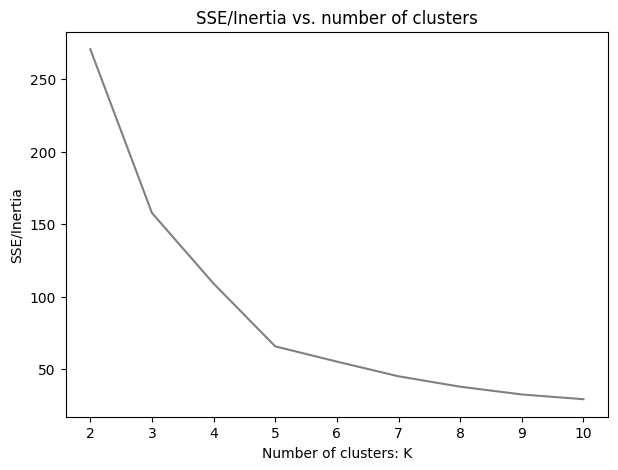

In [40]:
plt.figure(figsize=[7,5])
plt.plot(range(2,11), inertia_scores, color='gray') 
plt.title("SSE/Inertia vs. number of clusters") 
plt.xlabel("Number of clusters: K") 
plt.ylabel('SSE/Inertia')
plt.show()

In [ ]:
# Al observar el gráfico anterior, notamos que hay un codo en el gráfico 
# en K=5. Entonces, tomamos cinco como el número óptimo de grupos, el mejor valor
# de K para el algoritmo KMeans. 

# Antes de eso, cada grupo adicional nos brinda grandes ganancias al reducir 
# la suma de los errores al cuadrado. Más allá de cinco, parece que obtenemos 
# rendimientos extremadamente bajos.

Ahora emplearemos ambos enfoques para resolver un problema comercial utilizando la segmentación de clientes.

# Actividad 4.01: Optimización de la campaña de marketing de una marca de ropa de lujo utilizando Clustering

En una empresa que vende ropa de lujo el equipo de ventas ha recopilado datos sobre la edad del cliente, los ingresos, su gasto anual en el negocio y la cantidad de días desde su última compra. 

La empresa quiere iniciar campañas de marketing dirigidas, pero no sabe **cuántos tipos diferentes de clientes tiene**. Si se entendieran la cantidad de segmentos diferentes, ayudaría a diseñar mejor la campaña al ayudar a definir los canales a usar, los mensajes a emplear y más.

**El objetivo es realizar una segmentación de clientes para la empresa lo que les ayudará a optimizar sus campañas. Para que su enfoque sea sólido y más confiable para el negocio, debe llegar a la cantidad correcta de segmentos utilizando el enfoque de visualización y el método de Elbow con la suma de los errores al cuadrado.**

1. Importar las librerias requeridas para el manejo y graficado de DataFrame (pandas, numpy, matplotlib). Leer los datos del archivo `Clothing_Customers.csv`  en un DataFrame e imprimir las 5 filas superiores para comprenderlo mejor.

In [41]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns

!curl https://raw.githubusercontent.com/limspiga/customer-analytics/main/week-2b/Clothing_Customers.csv -O


data0 = pd.read_csv('Clothing_Customers.csv') 
data0.head()

# Los datos contienen los ingresos de los clientes, la edad, los días 
# desde su última compra y su gasto anual. 


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 18326  100 18326    0     0   223k      0 --:--:-- --:--:-- --:--:--  223k


,income,age,days_since_purchase,annual_spend
0,37453,48,504,4441
1,50775,50,566,4239
2,71047,41,326,5834
3,52239,52,259,5456
4,112343,27,279,1749


2. Estandarizar todas las columnas de los datos. Utilizar las cuatro columnas para la segmentación.

In [42]:
cluster_cols = data0.columns
data_scaled = data0.copy()

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

data_scaled[cluster_cols] = scaler.fit_transform(data0[cluster_cols])

3. Visualizar los datos para comprenderlos bien. Ya que está tratando con cuatro dimensiones, use PCA para reducir a dos dimensiones antes de trazar. 

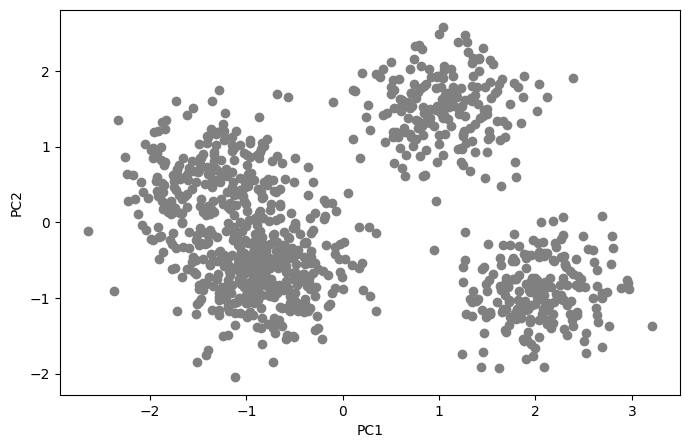

In [43]:
from sklearn import decomposition

pca = decomposition.PCA(n_components=2) 
pca_res = pca.fit_transform(data_scaled[cluster_cols])

data_scaled['pc1'] = pca_res[:,0]
data_scaled['pc2'] = pca_res[:,1]

plt.figure(figsize=[8,5])
plt.scatter(data_scaled.pc1, data_scaled.pc2, color='gray') 
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


4. Visualice el clustering con dos a siete grupos. Debería obtener la siguiente gráfica.


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

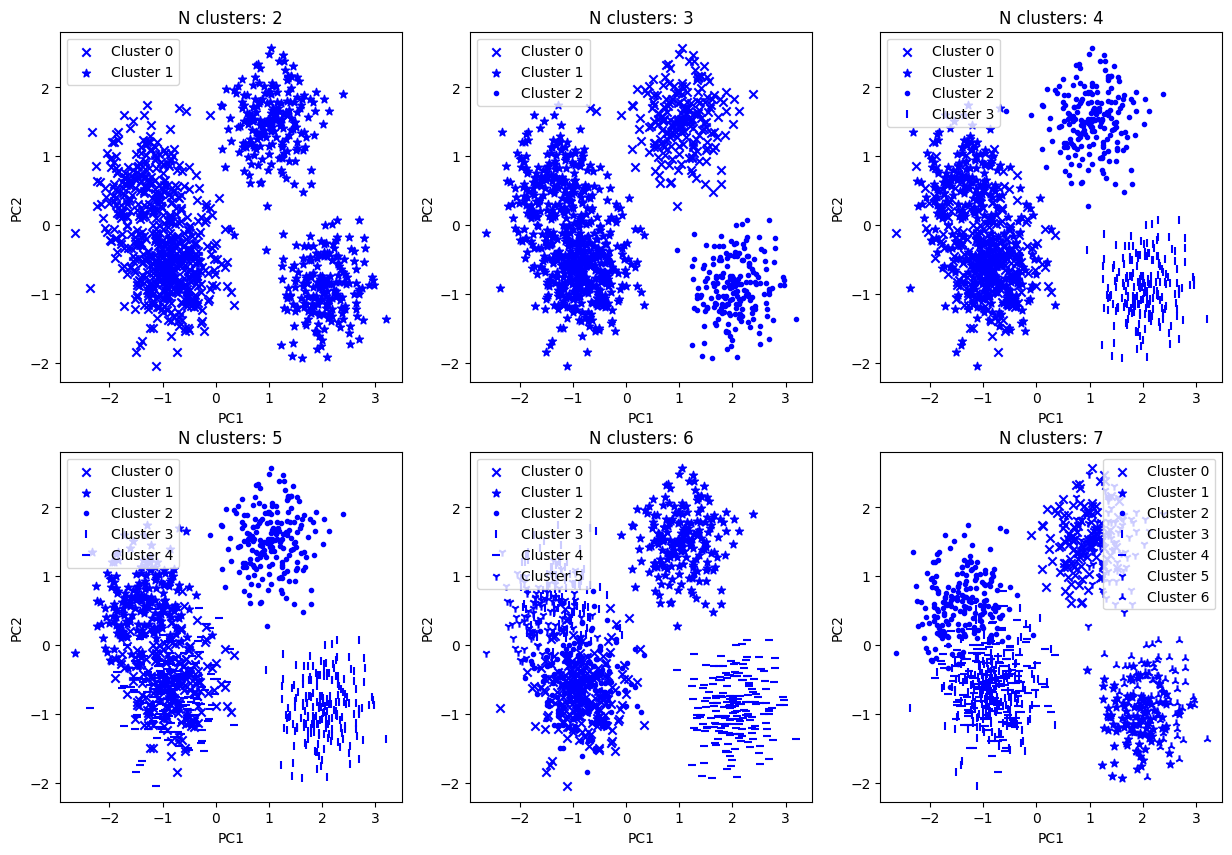

In [44]:
from sklearn.cluster import KMeans

markers = ['x', '*', '.', '|', '_', '1', '2']

plt.figure(figsize=[15,10])
for n in range(2,8):
    model = KMeans(n_clusters=n, random_state=42)
    data_scaled['Cluster']= model.fit_predict(data_scaled[cluster_cols])
    
    plt.subplot(2,3, n-1)
    for clust in range(n):
      temp = data_scaled[data_scaled.Cluster == clust]
      
      plt.scatter(temp.pc1, temp.pc2, \
                    marker=markers[clust], \
                    label="Cluster "+str(clust), \
                    color='blue')
      
      plt.xlabel("PC1")
      plt.ylabel("PC2")
      plt.legend()
      plt.title("N clusters: "+str(n))

plt.show()

# Desde la inspección visual, 3 parece ser el número correcto de grupos. 
# Más allá de 3, los grupos se superponen en gran medida.


Selección de clusters mediante el método del Elbow: crear un gráfico de la suma de los errores al cuadrado y busque un Elbow. Varíe la cantidad de grupos de 2 a 11. Debería obtener la siguiente gráfica.

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

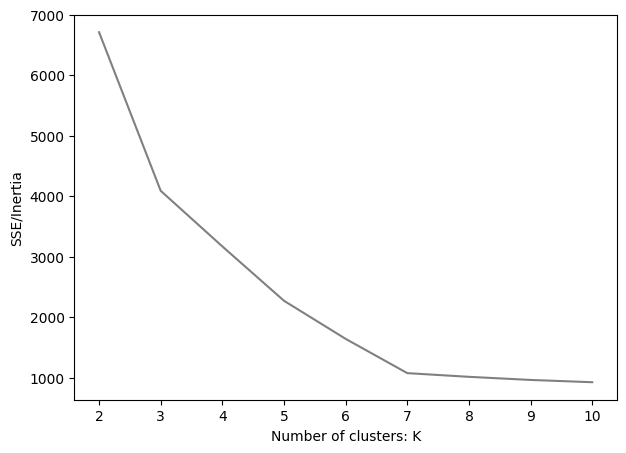

In [45]:
inertia_scores = []
for K in range(2,11):
    inertia = KMeans(n_clusters=K, random_state=42)\
              .fit(data_scaled).inertia_
    inertia_scores.append(inertia)
plt.figure(figsize=[7,5])
plt.plot(range(2,11), inertia_scores, color='gray') 
plt.xlabel("Number of clusters: K") 
plt.ylabel('SSE/Inertia')
plt.show()

Observe que el elbow está en K = 5. El método del elbow sugiere que cinco es el número óptimo de grupos


5. ¿Ambos métodos coinciden en el número óptimo de ebería obtener la siguiente gráfica? 

  En cuanto a los resultados de ambos, y en función de su comprensión de negocio, 
  - ¿Cuál es la cantidad de clústeres que elegiría? Explique su decisión.

El método elbow sugiere que cinco grupos son óptimos, mientras que el método de inspección visual sugiere 3. 

Recuerde que los datos de dimensionalidad reducida que emplean PCA pierden algo de información en el proceso de reducción de dimensionalidad. 
**El método de inspección visual, por lo tanto, no es completamente confiable.**

Con este conocimiento, decidimos que:
Aunque la inspección visual sugiere 3, no es un número óptimo de grupos. Mirando el gráfico SSE en la Figura 4.27, tenemos ganancias significativas al ir más allá
3 racimos.

El método del elbow sugiere 5 clústeres como óptimos, que no son demasiados para que la empresa actúe. 

# Otras técnicas de agrupamiento
En la actividad anterior nos dimos  cuenta de que se tenía que usar un enfoque más sólido para determinar la cantidad de clusters. 

Trató con datos multi-dimensionales para la agrupación y, por lo tanto, el análisis visual de las agrupaciones requirió el uso de PCA. Sin embargo, el enfoque de evaluación visual y el método Elbow del diagrama de inercia no concordaron muy bien.

Hasta ahora, hemos estado empleando el algoritmo k-means para agrupar en múltiples conjuntos de datos. Vimos que k-means es un algoritmo de agrupamiento útil porque es simple, ampliamente aplicable y se adapta muy bien a grandes conjuntos de datos. 

Sin embargo, no es el único algoritmo de agrupamiento disponible. 

# Mean-Shift Clustering
El Mean-Shift Clustering es un algoritmo que en contraste con el algoritmo de k-means no requiere que especifique el número de clusters. 

Su funcionamiento es bastante simple: 

- Comienza en cada punto de datos y 
- desplaza los puntos de datos (asignándolos a grupos) 
- hacia el área de mayor **densidad**, es decir, hacia un centroide de grupo natural. 


Cuando todos los puntos de datos han encontrado su pico de densidad local, el algoritmo está completo. **Esto es costoso desde el punto de vista computacional, por lo que este método no se adapta bien a grandes conjuntos de datos** (por otro lado, la agrupación en clústeres de k-means se adapta muy bien).

<figure>
<center><img src='https://drive.google.com/uc?export=view&id=19BsXx7tk9-Er3-BcTgQrEyESRilpAEIE' width="800" />
<figcaption>
Figura 4.11: Ilustración del funcionamiento del algoritmo de desplazamiento medio</figcaption></center>
</figure>

<figure>
<center><img src='https://drive.google.com/uc?export=view&id=1F-sxd_prNAoKh5TYQMee47IEq3NFhwP6' width="800" />
<figcaption>
Figura 4.11: Ilustración del funcionamiento del algoritmo de desplazamiento medio</figcaption></center>
</figure>



La figura 4.11 muestra el funcionamiento del algoritmo de desplazamiento medio. Tenga en cuenta que el *desplazamiento* de los puntos no significa que los puntos mismos se alteren, sino que hay una asignación a un centro de alta densidad. 

Efectivamente, a medida que avanzamos del paso 1 al paso 5, los grupos se vuelven más definidos y también las áreas de mayor densidad.

El hiperparámetro el ancho de banda  influye fuertemente en el comportamiento del algoritmo. También conocido como tamaño de ventana, el ancho de banda define qué tan lejos se verá cada punto de datos al buscar un área de mayor densidad. 


Como es de esperar, un mayor **ancho de banda** permitiría que los puntos miren más lejos y se vinculen a clústeres más lejanos y puede dar lugar a menos clústeres más sueltos y más grandes. Considere la imagen del Paso 1 en la Figura 4.11: si se empleara un parámetro de ancho de banda extremadamente alto (cerca de 1), todos los puntos se habrían agrupado en un grupo. Por otro lado, un valor más bajo de ancho de banda puede dar como resultado una mayor cantidad de clústeres estrechos. Volviendo al Paso 1 de la Figura 4.11, si usáramos un valor de ancho de banda muy bajo (cerca de 0) habríamos llegado a docenas de clústeres. El parámetro, por lo tanto, tiene un fuerte impacto en el resultado y necesita ser equilibrado.

Un método común para determinar el mejor ancho de banda es estimarlo en función de las distancias entre los puntos cercanos (usando un parámetro de cuantil que especifica la proporción de puntos de datos para mirar).

Este método **requiere que elija un cuantil que determine la proporción de puntos para mirar**. Esto no es trivial.

En Python para estimar el ancho de banda, se usa la función `estimate_bandwidth` en scikit-learn. La función devuelve el ancho de banda calculado.

In [ ]:
# from sklearn.cluster import estimate_bandwidth
# bandwidth = estimate_bandwidth(data, quantile=quantile_value)

# Data es el conjunto de datos que desea agrupar eventualmente y quantile_value 
# es el valor para quantile que puede especificar.

# Ejercicio 4.04: Agrupamiento de desplazamiento medio en clientes de centros comerciales

En este ejercicio, agrupará a los clientes del centro comercial utilizando Mean-Shift Clustering.

Empleará las columnas `Income` y `Spend_score` como criterio. Primero especificará manualmente el parámetro de ancho de banda. Luego, estimará el parámetro de ancho de banda utilizando el método de estimación de ancho de banda y verá cómo varía con la elección del cuantil.

1. Importe `MeanShift` y `estimate_bandwidth` de banda de sklearn y cree un `bandwidth` variable con un valor de `0.9`: el ancho de banda a usar (un valor alto arbitrario).

In [46]:
from sklearn.cluster import MeanShift, estimate_bandwidth
bandwidth = 0.9

2. Para realizar el mean-shift clustering  en los datos estandarizados, cree una instancia de `MeanShift`, especificando el ancho de banda y configure `bin_seeding = True` (para acelerar el algoritmo). Ajuste el modelo a los datos y asigne el clúster a la variable 'Cluster'.

In [47]:
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True) #  acelerar el algoritmo
cluster_cols = ['Income', 'Spend_score'] # to fix
ms.fit(mall_scaled[cluster_cols]) # se toman las columnas
mall_scaled['Cluster'] = ms.predict(X)

3. Visualice los clustesrs mediante un diagrama de dispersión.

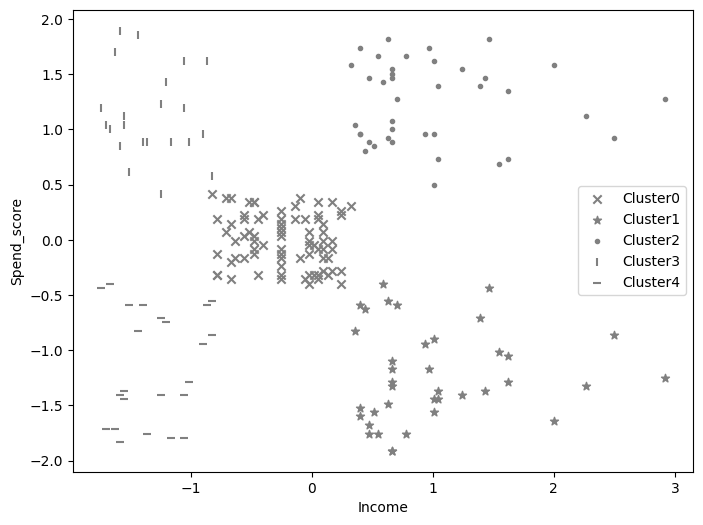

In [48]:
markers = ['x', '*', '.', '|', '_', '1', '2']
plt.figure(figsize=[8,6])
for clust in range(mall_scaled.Cluster.nunique()):
    temp = mall_scaled[mall_scaled.Cluster == clust]
    plt.scatter(temp.Income, temp.Spend_score, marker=markers[clust],  label="Cluster"+str(clust),  color='gray')
plt.xlabel("Income")
plt.ylabel("Spend_score")
plt.legend()
plt.show()

El modelo ha encontrado 5 clústeres únicos. Están muy alineados con los grupos a los que llegó anteriormente usando K-means donde especificó 5 grupos. Pero observe que los grupos de la derecha tienen **áreas de muy baja densidad**. La elección del ancho de banda ha llevado a estos clústeres sueltos.

4. Calcule el ancho de banda requerido usando el método de `estimate_bandwidth` de banda. Utilice la función `estimate_bandwidth` de banda con un valor cuantil de 0,1 (una elección arbitraria) para estimar el mejor ancho de banda a utilizar. Imprima el valor, ajuste el modelo y anote el número de clusters, usando el siguiente código:

In [49]:
bandwidth = estimate_bandwidth(mall_scaled[cluster_cols], \
                               quantile=0.1) # la distancia entre los puntos
print(bandwidth) # inicialmente es de 9

0.6487582521320147


Obtendrá un valor de alrededor de 0.649. Usando esto, ajusta el modelo a los datos.

In [50]:
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(mall_scaled[cluster_cols])
mall_scaled['Cluster']= ms.predict(mall_scaled[cluster_cols])
mall_scaled.Cluster.nunique() # numero de clusters

7

5. Visualice los clústeres obtenidos mediante un diagrama de dispersión.

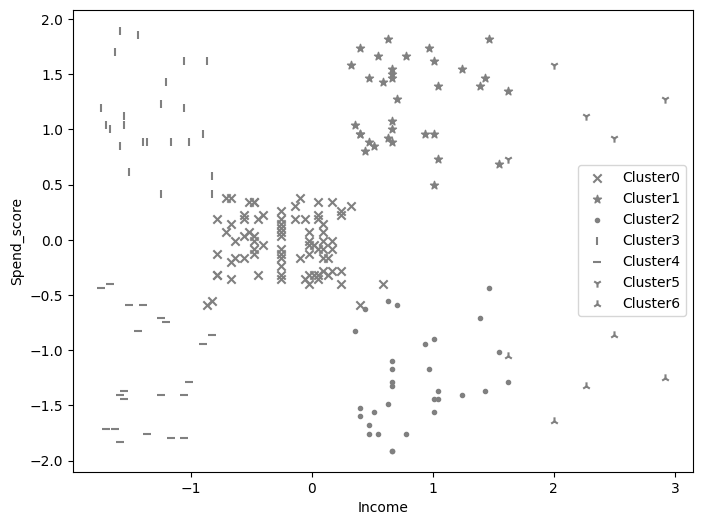

In [51]:
plt.figure(figsize=[8,6])
for clust in range(mall_scaled.Cluster.nunique()):
    temp = mall_scaled[mall_scaled.Cluster == clust]
    plt.scatter(temp.Income, temp.Spend_score, marker=markers[clust], label="Cluster"+str(clust), color='gray')
plt.xlabel("Income")
plt.ylabel("Spend_score")
plt.legend()
plt.show()

6. Vuelva a estimar el ancho de banda, esta vez con un valor cuantil de 0.15. Imprime el número de racimos obtenidos.

In [54]:
bandwidth = estimate_bandwidth(mall_scaled[cluster_cols], quantile=0.15) # la distancia es más pequeña
print(bandwidth)

0.8582301835333547


7. Utilice el ancho de banda calculado en el paso anterior para ajustar y extraer la cantidad de clústeres.

In [55]:
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(mall_scaled[cluster_cols])
mall_scaled['Cluster']= ms.predict(mall_scaled[cluster_cols])
mall_scaled.Cluster.nunique()

5

8. Visualiza los clusters obtenidos.

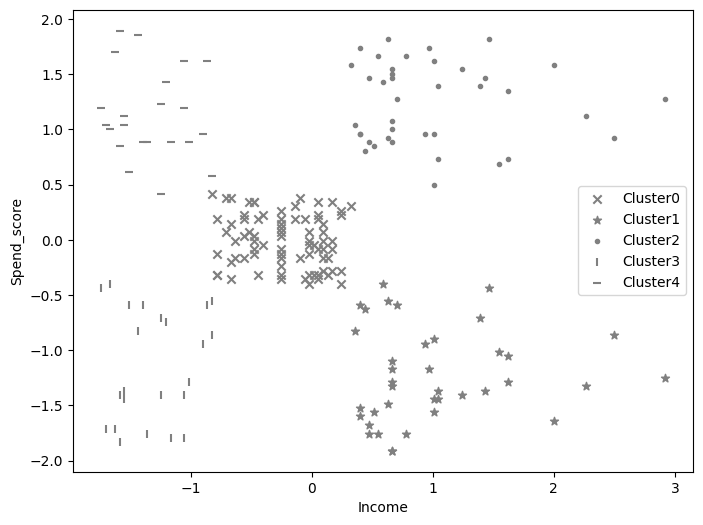

In [56]:
plt.figure(figsize=[8,6])
for clust in range(mall_scaled.Cluster.nunique()):
    temp = mall_scaled[mall_scaled.Cluster == clust]
    plt.scatter(temp.Income, temp.Spend_score, marker=markers[clust], label="Cluster"+str(clust), color='gray')
plt.xlabel("Income")
plt.ylabel("Spend_score")
plt.legend()
plt.show()

# Puede ver en la Figura 4.14 que ha obtenido cinco grupos. 
# Este es el número óptimo como ha visto desde múltiples enfoques, 
# incluida la inspección visual.


# Beneficios y desventajas de la técnica de Mean-Shift Clustering
En el ejercicio anterior, vimos que el algoritmo de Mean-Shift Clustering también tenía sus propios hiperparámetros clave. Esta es nuevamente una elección que debe hacer el usuario. Entonces, ¿por qué molestarse con el agrupamiento de cambio medio? Para responder a esto, comprendamos los beneficios y los inconvenientes del algoritmo de Mean-Shift Clustering

Beneficios de Mean-Shift Clustering

1. No necesitamos especificar previamente el número de clústeres.
2. El único parámetro, el ancho de banda, tiene un significado físico y sus efectos son fáciles de interpretar.
3. Puede identificar cúmulos de formas complejas (k-medias solo dio cúmulos esféricos/globulares).
4. Robusto frente a valores atípicos.

Inconvenientes del algoritmo de Mean-Shift Clustering

1. Computacionalmente caro, no se adapta bien a grandes conjuntos de datos.
2. No funciona bien con un gran número de dimensiones (conduce a clústeres inestables).
3. No hay control directo sobre la cantidad de clústeres, lo cual es problemático cuando tenemos restricciones comerciales sobre la cantidad de clústeres.

# K-modes y K-prototypes Clustering


La agrupación en clústeres de k-means es excelente cuando se trata exclusivamente de datos cuantitativos. Sin embargo, cuando tiene datos categóricos (es decir, datos que no se pueden convertir en orden numérico, como raza, idioma y país) con más de dos categorías, la representación de estos datos mediante números se convierte en una consideración clave. 

En estadística, una estrategia común para manejar datos categóricos es usar variables ficticias, la práctica de crear una nueva variable indicadora para cada categoría, de modo que cada una de estas variables ficticias sea binaria. Al agrupar, esto puede generar complicaciones, porque si tiene muchas categorías diferentes, está agregando muchas dimensiones diferentes para cada variable categórica y el resultado a menudo no reflejará correctamente los tipos de agrupaciones que está buscando.

Para manejar tales situaciones, dos métodos relacionados hacen que el manejo de datos categóricos sea más natural. k-modes es un algoritmo de agrupamiento que usa la **moda** de un grupo en lugar de la **media**, pero por lo demás funciona como el algoritmo k-means. Al igual que la media es una buena medida para el valor típico/central de una variable continua, la 'moda' o la categoría que aparece con mayor frecuencia es el valor típico de una variable categórica. El algoritmo K-modes ​​es una excelente opción para datos categóricos.

El agrupamiento de k-prototypes le permite tratar casos en los que hay una combinación de variables categóricas y continuas. En lugar de definir un centroide para cada grupo como k-means o k-modes, el agrupamiento de k-prototypes elige un 
- **punto de datos** 
para que sea el prototipo y lo usa como si fuera el centroide del grupo, actualizándolo a un nuevo punto de datos más cercano a el centro de todos los puntos de datos asignados a ese grupo utilizando el mismo proceso que k-means o k-modes.

Para la implementación de Python, utilizará el paquete `kmodes`. Asegúrese de instalar el paquete, lo que se puede hacer con el comando pip:

In [57]:
!pip install kmodes
from kmodes.kprototypes import KPrototypes
# kp = KPrototypes(n_clusters=N, random_state=seed_value)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Donde $N$ es el número de grupos y `seed_value` es el estado aleatorio para garantizar la reproducibilidad de los resultados. Luego, el modelo se puede ajustar a cualquier conjunto de datos usando un comando como el siguiente:

In [ ]:
#  kp.fit(dataset)

Donde el conjunto de datos contiene los datos que desea agrupar. Tenga en cuenta que la sintaxis es consistente con el paquete Kmeans y los métodos `fit_predict` y predict funcionarán de la misma manera. Una sintaxis similar también funcionará para la técnica Kmodes.

# Ejercicio 4.05: Clustering Data usando el método de k-prototypes
Para este ejercicio, revisará el problema de segmentación de clientes para Therabank, que encontró en la Actividad 3.01. El objetivo es conseguir que más clientes opten por un préstamo personal para aumentar la rentabilidad de la cartera del banco. 

La creación de segmentos de clientes ayudará al banco a identificar los tipos de clientes, ajustar sus mensajes en las campañas de marketing para el producto de préstamo personal. El conjunto de datos proporcionado contiene datos de los clientes, incluidos datos demográficos, cierta información financiera y cómo respondieron estos clientes a una campaña anterior.

1. Importe pandas y lea los datos del archivo `Bank_Personal_Loan_Modelling-2.csv` en un dataframe llamado bank0:





In [58]:
import pandas as pd
!curl https://raw.githubusercontent.com/limspiga/customer-analytics/main/week-2b/Bank_Personal_Loan_Modelling-2.csv -O

bank0 = pd.read_csv("Bank_Personal_Loan_Modelling-2.csv") 
bank0.head()

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  229k  100  229k    0     0  1540k      0 --:--:-- --:--:-- --:--:-- 1540k


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,Primary,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,Primary,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,Primary,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,Secondary,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,Secondary,0,0,0,0,0,1


2. Estandarice la columna `Income`

In [59]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
bank_scaled = bank0.copy()
bank_scaled['Income'] = scaler.fit_transform(bank0[['Income']])

3. Importe k-prototypes desde el módulo kmodes. Realice em método de  Clustering Data de k-prototypes usando 3 clusters, especificando la columna de `Education` (en el índice de columna 1) como categórica, y guarde el resultado de la agrupación como una nueva columna denominada `Cluster`. Especifique `random_state = 42` para mantener la coherencia.

In [60]:
from kmodes.kprototypes import KPrototypes
cluster_cols = ['Income', 'Education']
kp = KPrototypes(n_clusters=3, random_state=42)
bank_scaled['Cluster'] = kp.fit_predict(bank_scaled[cluster_cols],categorical=[1]) # 1 = education

4. Para comprender los clusters obtenidos, obtenga las proporciones de los diferentes niveles educativos en cada cluster usando el siguiente código.

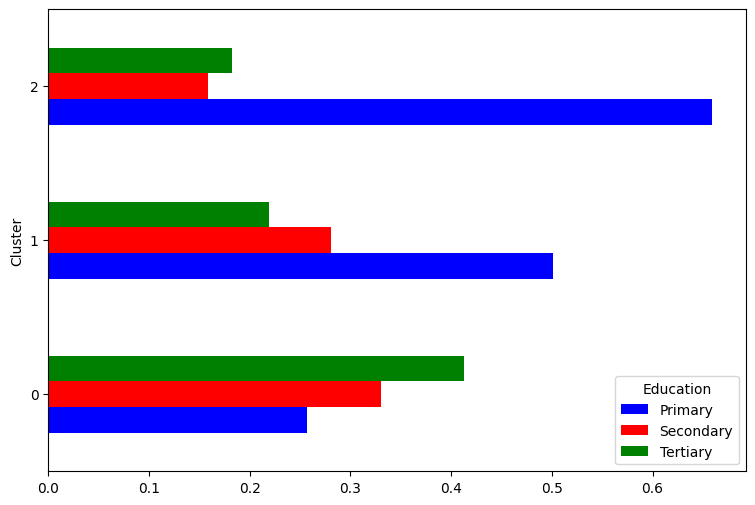

In [62]:
res = bank_scaled.groupby('Cluster')['Education']\
                 .value_counts(normalize=True)

res.unstack().plot.barh(figsize=[9,6], color=['blue','red','green']) 
plt.show()


Puede ver en la Figura 4.16 que el grupo 2 está dominado por clientes con educación primaria. En el grupo 1, la cantidad de clientes con educación primaria es aproximadamente igual a la cantidad de clientes con educación secundaria y terciaria juntas. En el clúster 0, los clientes con educación superior (secundaria o terciaria) superan significativamente a los que tienen educación primaria.


# ¿Cuál de los enfoques es el mejor? Evaluación del Clustering

Antes de responder eso, debemos poder evaluar qué tan buenos son los resultados del agrupamiento. Solo entonces podemos comparar los enfoques de segmentación. Necesitamos tener, por lo tanto, **formas de evaluar la calidad de la agrupación**.

Es esencial contar con una forma objetiva y basada en principios de evaluar los clústeres. Los métodos cuantitativos para la evaluación de clusters eliminan la subjetividad y tienen la ventaja adicional de permitir cierto nivel de automatización. Una de esas medidas es **Silhouette Score**, un  método objetivo que se puede utilizar con datos que son más difíciles de visualizar. 

Tenga en cuenta que la silhouette score es una medida general de qué tan bien se ajusta un cluster a los datos, por lo que se pueden usar no solo para comparar dos modelos diferentes de diferentes tipos, sino también para elegir hiperparámetros, como el número de clústeres o la elección del cuantil para calcular el ancho de banda para el agrupamiento de desplazamiento medio.

# Silhouette Score
Una forma natural de evaluar los clusters es revisando que están bien separados, cualquier punto de un clusters debería estar más cerca de la mayoría de los puntos del mismo clusters que de un punto de otro cluster.

Esta intuición cuantifica a través de la puntuación de la silueta. La puntuación de la silueta es una medida formal de qué tan bien se ajusta una cluster a los datos. 
- **Cuanto mayor sea la score, mejores serán los grupos.** 
La puntuación se calcula para cada punto de datos por separado, y el promedio se toma como una medida de qué tan bien se ajusta el modelo a todo el conjunto de datos.

Hay dos componentes principales en la score:

- **El primer componente mide qué tan bien encaja el punto de datos en el grupo que se le asigna**. 

  Esto se define como la distancia promedio entre él y todos los demás miembros de ese mismo grupo.
- **El segundo componente mide qué tan bien encaja el punto de datos en el siguiente grupo más cercano**. 

  Se calcula de la misma manera midiendo la distancia promedio entre el punto de datos y todos los puntos de datos asignados al siguiente grupo más cercano. 

La diferencia entre estos dos números se puede tomar como una medida de qué tan bien encaja el punto de datos en el grupo al que está asignado en comparación con un grupo diferente. 

Más formalmente, dado el punto de datos $x_i$, 
- donde $a_{xi}$ es la distancia promedio entre ese punto de datos y todos los demás puntos de datos en el mismo grupo y
- $b_{xi}$ es la distancia promedio entre el punto de datos $x_i$ y 

los puntos de datos en el siguiente grupo más cercano, el puntaje de silueta se define de la siguiente manera:

<h1><center>
$ s(x_i) =  \frac{b_x{_i} - a_{x_i}} {max(a_x{_i}, b_x{_i})}  $


Figura 4.17: Ecuación para calcular la puntuación de silueta para un punto de datos
</center><h1>

Tenga en cuenta que, dado que dividimos por el máximo de $a_{x_i}$ y $b_{x_i}$, obtenemos un número entre −1 y 1. Una puntuación negativa significa que este punto de datos está, en promedio, más cerca del otro grupo, mientras que una puntuación positiva alta significa que es mucho mejor ajuste al clúster al que está asignado. 
Un valor cercano a 0 significaría que la muestra está cerca de ambos clusters. Cuando tomamos el puntaje promedio en todos los puntos de datos, aún obtendremos un número entre −1 y 1, donde cuanto más cerca estemos de uno, mejor será el ajuste.

El silhouette score en Python se calcula mediante la utilidad silhouette_score en scikit-learn.

    from sklearn.metrics import silhouette_score
    silhouette_avg = silhouette_score(data, cluster_assignments)

donde data contiene los datos agrupados y `cluster_assignments` son los clústeres asignados a las filas.

Tenga en cuenta que la puntuación de la silueta es una medida general de qué tan bien se ajusta una agrupación a los datos, por lo que puede usarse para elegir la cantidad óptima de agrupaciones para el conjunto de datos. También podemos usar la medida para comparar clústeres de diferentes algoritmos, una idea que exploraremos más adelante en este capítulo. Procedamos y usemos la puntuación de la silueta para elegir el número de grupos.

# Ejercicio 4.06: uso del silhouette score para elegir el número óptimo de clusters

En este ejercicio, continuará trabajando en la segmentación de clientes del centro comercial. 

El objetivo del ejercicio es identificar el número correcto de custers utilizando un enfoque estadístico, es decir, la silhouette score. Realizará el agrupamiento de k-means en los clientes del centro comercial utilizando diferentes cantidades de agrupaciones y utilizará silhouette score para determinar la mejor cantidad de agrupaciones para usar.

1. Usar el conjunto de datos de clientes del centro comercial a escala (`mall_scaled`) creado en el Ejercicio 4.02. Ajustr un modelo KMeans usando las características 'Income' y 'Spend_score', especificando 3 clústeres. Extraiga el cluster asignado para cada punto, usando el método `fit_predict` del modelo 

In [63]:
cluster_cols = ['Income', 'Spend_score']
X = mall_scaled[cluster_cols]
model = KMeans(n_clusters=3, random_state=42)
cluster_assignments = model.fit_predict(X)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


2. Importe el método `silhouette_score` de sklearn y calcule el puntaje de silueta promedio para las asignaciones de grupos actuales con tres grupos

In [64]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X, cluster_assignments)
print(silhouette_avg)

# Debería obtener el valor 0.467. 
# Tenga en cuenta que este número por sí mismo no es intuitivo y puede no significar mucho,
# pero es útil como medida relativa, como veremos en el siguiente paso.

0.46658474419000145


3. Ahora que sabe cómo calcular el puntaje de la silueta, puede calcular los puntajes, pasando por diferentes valores de K (2-10), de la siguiente manera:

In [65]:
silhouette_scores = []
for K in range(2, 11):
  model = KMeans(n_clusters=K, random_state=42) 
  cluster_assignments = model.fit_predict(X)
  silhouette_avg = silhouette_score(X, cluster_assignments) 
  silhouette_scores.append(silhouette_avg)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

4. Haz un gráfico de líneas con la puntuación de la silueta para los diferentes valores de K. Luego identifica el mejor valor de K del gráfico.

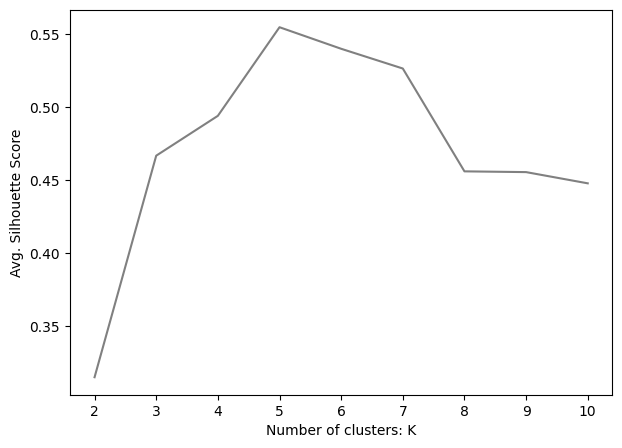

In [66]:
plt.figure(figsize=[7,5])
plt.plot(range(2,11), silhouette_scores, color='gray') 
plt.xlabel("Number of clusters: K")
plt.ylabel('Avg. Silhouette Score')
plt.show()

# A partir del gráfico anterior, puede inferir que K=5 tiene la mejor 
# puntuación de silueta y, por lo tanto, es el número óptimo de clusters.

# División de entrenamiento y prueba 
Los métodos discutidos hasta ahora consistían en examinar, ya sea visualmente o mediante números, qué tan bien separados estaban los grupos. Otro aspecto importante de la calidad de los clusters es cuán generalizables son a nuevos datos. Una preocupación bastante común en ML es el problema del sobreajuste. 

**El Overfitting es cuando un modelo de aprendizaje automático se adapta tan bien a los datos que se utilizaron para crearlo que no se generaliza a nuevos datos.**

Este problema suele ser una preocupación mayor en el aprendizaje supervisado, donde hay una etiqueta con el resultado correcto que se espera del algoritmo.

Sin embargo, también puede ser una preocupación con el agrupamiento cuando intenta elegir la mejor técnica de agrupamiento o los hiperparámetros que se ajustan a los datos. Uno de los problemas es obtener un buen resultado simplemente por casualidad. Debido a que probamos muchas combinaciones de parámetros y algoritmos, existe la posibilidad de que un conjunto resulte ganador solo por alguna peculiaridad en los datos con los que se entrenó. 

<figure>
<center><img src='https://drive.google.com/uc?export=view&id=1ArRJY-CeXiBadu1osEqnYGAs-tPDwUgv' width="800" />
<figcaption>
Figura 4.19: El proceso de división de la prueba de entrenamiento ilustrado</figcaption></center>
</figure>


**Por lo tanto, se considera una buena práctica evaluar sus modelos utilizando una parte reservada de los datos llamada conjunto de prueba.** 

La Figura 4.19 muestra los pasos empleados en el proceso. El conjunto de datos primero se ordena aleatoriamente para que no haya ningún orden en las filas y, por lo tanto, la lógica subyacente que se empleó para ordenar las filas en los datos ya no es aplicable. 

Esto garantizaría que en el siguiente paso, donde se asignan algunos registros al entrenamiento y a los conjuntos de prueba, la asignación se realiza de forma aleatoria. Tal muestreo aleatorio ayuda a que cada uno de los conjuntos sea representativo de todo el conjunto de datos. Esto es útil porque si cualquier modelo que haya funciona bien en el conjunto de prueba (que nunca antes visto), entonces puede estar seguro de que el modelo también se generalizará bien a otros datos no vistos.

Antes de realizar cualquier tipo de agrupamiento, los datos se dividen en el conjunto de entrenamiento y el conjunto de prueba. Luego, el modelo se ajusta utilizando el conjunto de entrenamiento, lo que significa que los centroides se definen en función de la ejecución del algoritmo k-means en esa parte de los datos. Luego, los datos de prueba se asignan a grupos en función de esos centroides, y el modelo se evalúa en función de qué tan bien se ajustan esos datos de prueba. 

**Dado que el modelo no se entrenó con el conjunto de prueba, es como si el modelo encontrara nuevos datos, y puede ver qué tan bien generaliza su modelo a estos nuevos datos, que es lo que más importa**.

Para la implementación de Python de la división `train-test`, emplearemos la función `train_test_split` de scikit-learn. La función es fácil de usar y devuelve conjuntos de entrenamiento y prueba de cualquier conjunto de datos que se le proporcione.

    from sklearn.model_selection import train_test_split

A continuación, ejecute la función proporcionándole el conjunto de datos para dividir, la proporción de datos que se incluirán en el conjunto de trenes y un estado aleatorio para la coherencia de los resultados, como en el siguiente comando:

    data_train, data_test = train_test_split\
                    (data, train_size = 0.8, \
                         random_state=seed_value)


En el ejemplo anterior, el 80 % de los puntos de datos se asignan al conjunto de entrenamiento y el 20% al conjunto de prueba. La función devuelve dos conjuntos de datos correspondientes al entrenamiento y conjuntos de datos de prueba respectivamente. Los conjuntos de datos de entrenamiento y prueba estarán disponibles para continuar con el proceso de modelado. Veamos ahora la división de prueba del entrenamiento en acción y usémosla para evaluar el rendimiento de la agrupación.

# Ejercicio 4.07: Uso de Train-Test Split para evaluar el rendimiento del Clustering
En este ejercicio, utilizará un enfoque de train-test split de entrenamiento para evaluar el rendimiento de la agrupación en Clusters. El objetivo del ejercicio es garantizar segmentos de clientes confiables y sólidos de los clientes del centro comercial. 

Deberá separar los datos de entrenamiento y de prueba primero. Luego, ajustará un modelo de K-means con un número subóptimo de clusters. Si los grupos son buenos, la puntuación de la silueta debe ser coherente entre los datos de entrenamiento y de la prueba. 

1. Importe la función `train_test_split` de sklearn y realice la división en los datos del cliente del centro comercial. Especifique el tamaño del entrenamiento como 0,75 y
a `random_state = 42`. 

In [68]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split\
                    (mall0, train_size=0.75, \
                     random_state=42)

Especificar un `train_size` de 0,75 asigna el 75 % de los registros al conjunto de entrenamiento y el resto al conjunto de prueba. El uso de `random_state` garantiza que los resultados sean reproducibles.

In [69]:
print(df_train.shape)
print(df_test.shape)

# Las formas se imprimirían de la siguiente manera:

(150, 5)
(50, 5)


2. Ajuste un modo Kmeans con 6 grupos en los datos de entrenamiento. Calcule la puntuación media de la silueta. Ignore las advertencias (si las hay) resultantes de este paso.

In [73]:
model = KMeans(n_clusters=6, random_state=42) 
df_train['Cluster'] = model.fit_predict(df_train[cluster_cols]) 
silhouette_avg = silhouette_score\
                 (df_train[cluster_cols], df_train['Cluster'])
print(silhouette_avg)

# La puntuación debe ser 0,545. A continuación, 
# averigüe la puntuación cuando se aplica el modelo al conjunto de prueba.

0.5436475209961419


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


3. Usando el método de predicción del modelo, prediga los grupos para los datos de prueba. Luego, calcule el puntaje de silueta promedio para los datos de prueba usando el siguiente código. Ignore las advertencias, si las hay, del código.


In [71]:
df_test['Cluster'] = model.predict(df_test[cluster_cols])
silhouette_avg = silhouette_score\
                 (df_test[cluster_cols],df_test['Cluster'])
print(silhouette_avg)

# El puntaje de la silueta es 0.495, que es una gran caída de 0.545 en el
# juego de entrenamiento. Para comprender la causa de esta caída,
# deberá visualizar los grupos en los datos de prueba.

0.49569011684195546


4. Visualice los grupos pronosticados en los datos de prueba usando un gráfico de dispersión, marcando los diferentes grupos.

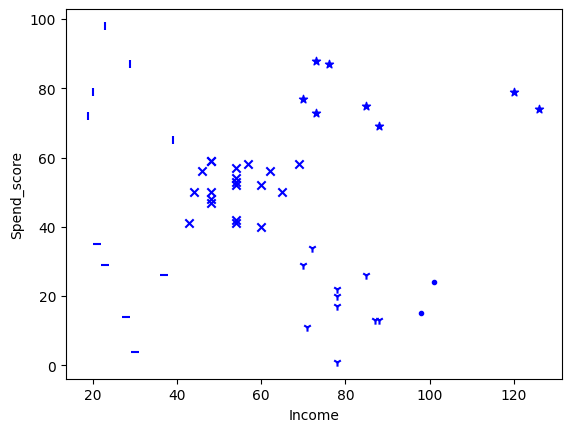

In [98]:
for clust in range(df_test.Cluster.nunique()):
    temp = df_test[df_test.Cluster == clust]
    plt.scatter(temp.Income, temp.Spend_score, marker=markers[clust], color='blue') 
    plt.xlabel("Income")
plt.ylabel("Spend_score")
plt.show()

¿Qué deduces de la gráfica? Primero, el grupo superior derecho no parece ser bueno. Hay dos puntos que están lejos de la parte densa del cluster. Este no es un grupo apretado. En segundo lugar, el grupo inferior derecho contiene solo dos puntos, los cuales están muy cerca de otro grupo. Este cluster debe fusionarse con el cluster adyacente.

# Actividad 4.02: Evaluación Clustering de datos de clientes
Usted es gerente de ciencia de datos en la división de marketing de una importante empresa multinacional de bebidas alcohólicas. 

Durante el año pasado, el equipo de marketing lanzó 32 iniciativas para aumentar sus ventas. Su equipo ha adquirido datos que le indican qué clientes han respondido recientemente a cuáles de las 32 iniciativas de marketing (estos datos están presentes en el archivo customer_offers.csv). 

El objetivo de negocio es mejorar las futuras campañas de marketing centrándolas con precisión, de modo que puedan ofrecer ofertas personalizadas a grupos que tienden a responder a ofertas similares. 

La solución es construir segmentos de clientes basados en las respuestas de los clientes a iniciativas pasadas.
En esta actividad, empleará un enfoque minucioso de la agrupación al probar varias técnicas de agrupación. Además, empleará enfoques estadísticos para la evaluación de conglomerados para garantizar que sus resultados sean confiables y sólidos. Utilizando las técnicas de evaluación de clústeres, también ajustará los hiperparámetros, según corresponda, para los algoritmos de agrupación en clústeres. 

1. Importe las bibliotecas necesarias para el manejo, agrupación y visualización de datos.

  Importe datos de customer_offers.csv a un marco de datos de pandas.

In [108]:
import pandas as pd
from sklearn import cluster
from sklearn import metrics
import matplotlib.pyplot as plt 
%matplotlib inline

!curl https://raw.githubusercontent.com/limspiga/customer-analytics/main/week-2b/customer_offers.csv -O

df = pd.read_csv('customer_offers.csv') 
df.head()

# Las 32 columnas corresponden a las 32 iniciativas del año pasado. 
# Cada fila representa un cliente. 
# Vemos que los valores son 0 o 1, indicadores de si el cliente 
# respondió a la campaña, con 1 representando una respuesta.

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  6487  100  6487    0     0   301k      0 --:--:-- --:--:-- --:--:--  301k


,1,2,3,4,5,6,7,8,9,10,...,23,24,25,26,27,28,29,30,31,32
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0


2. Divida el conjunto de datos en conjuntos de entrenamiento y prueba mediante el método `train_test_split` de scikit-learn. Especifique random_state como 100 para mantener la coherencia.


In [109]:
from sklearn import model_selection
X_train, X_test = model_selection.train_test_split\
                  (df, random_state = 100)

3. Realice k-means en los datos. Identifique el número óptimo de clusters utilizando el método de puntaje de silueta en los datos de entrenamiento graficando el score para el número diferente de clusters, que varía de 2 a 10.

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

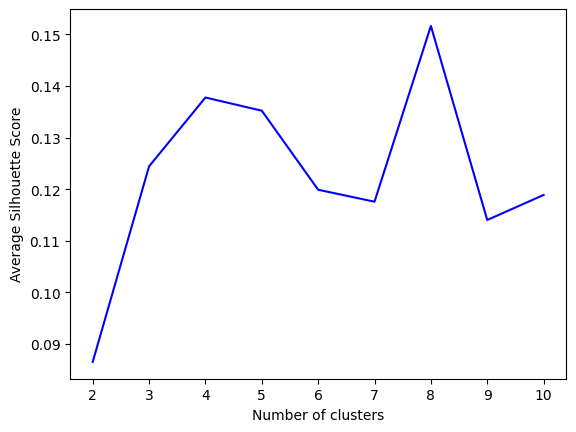

In [110]:
krange = list(range(2,11))
avg_silhouettes = []

for n in krange:
  model = cluster.KMeans(n_clusters=n, random_state=42) 
  model.fit(X_train)

  cluster_assignments = model.predict(X_train)
  silhouette_avg = metrics.silhouette_score(X_train, cluster_assignments)
  avg_silhouettes.append(silhouette_avg)

plt.plot(krange, avg_silhouettes, color='blue') 
plt.xlabel("Number of clusters") 
plt.ylabel('Average Silhouette Score') 
plt.show()

# En el gráfico de las puntuaciones de la silueta, 
# observará que la puntuación máxima de la silueta se obtiene en k=4 y es de alrededor de 0.135



4. Realice K means usando el k encontrado en el paso anterior. Imprima la puntuación de la silueta en el conjunto de prueba.


In [112]:
model = cluster.KMeans(n_clusters=3, random_state=100)
model.fit(X_train)
km_labels = model.predict(X_test)
km_silhouette = metrics.silhouette_score(X_test, km_labels)
print('k-means silhouette score: ' + str(km_silhouette))

# La puntuación de la silueta resultante debería ser de alrededor de 0,103. 
# Esto es ligeramente más bajo que el puntaje del entrenamiento de 0.135. 
# Tenga en cuenta que el resultado no se generaliza muy bien en los datos de prueba.



k-means silhouette score: 0.05430581044422598


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


5. Realice un mean-shift clustering en los datos, utilizando el método de estimate_bandwidth de banda con un valor de cuantil de 0.1 para estimar el ancho de banda. Imprima la puntuación de la silueta del modelo en el conjunto de prueba.


In [113]:
bandwidth = cluster.estimate_bandwidth(X_train, quantile=0.1)
ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)
ms_labels = ms.predict(X_test)
ms_silhouette = metrics.silhouette_score(X_test, ms_labels)
print('mean-shift silhouette score: ' + str(ms_silhouette))

# La puntuación de la silueta resultante debería ser de alrededor de 0,073. 
#Tenga en cuenta que esto es significativamente más bajo que el puntaje para la técnica de k-means.



mean-shift silhouette score: 0.07308587709358311


6. Realice k-modes en los datos. Identifique la cantidad óptima de clústeres utilizando el enfoque de puntuación de silueta en los datos de entrenamiento trazando la puntuación para la cantidad diferente de clústeres, que varía de 3 a 10.

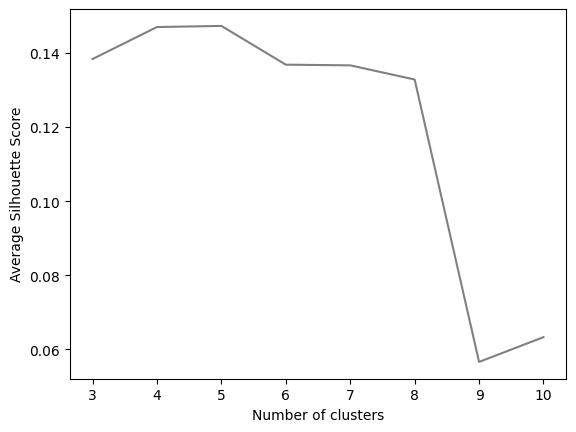

In [114]:
from kmodes.kmodes import KModes
krange = list(range(3,11))
avg_silhouettes = []
for n in krange:
    km = KModes(n_clusters=n, random_state=100) 
    km.fit(X_train)

    kmode_labels = km.predict(X_train)
    kmode_silhouette = metrics.silhouette_score (X_train, kmode_labels)
    avg_silhouettes.append(kmode_silhouette)
plt.plot(krange, avg_silhouettes, color='gray') 
plt.xlabel("Number of clusters") 
plt.ylabel("Average Silhouette Score") 
plt.show()

# La puntuación de la silueta es prácticamente la misma para 4 y 5 clusters. 
# Preferimos K=4 ya que obtenemos la misma puntuación de silueta 
# con un menor número de grupos.



7. Usando K encontrado en el paso anterior, realice K-modes en los datos. Imprima la puntuación de la silueta en el conjunto de prueba.


In [115]:
km = KModes(n_clusters=4, random_state=100)
km.fit(X_train)
kmode_labels = km.predict(X_test)
kmode_silhouette = metrics.silhouette_score\
                   (X_test, kmode_labels)
print('k-mode silhouette score: ' + str(kmode_silhouette))

# La puntuación de la silueta para el conjunto de prueba es de alrededor de 0.118. 
# Tenga en cuenta que este es el valor más alto de los tres enfoques.

k-mode silhouette score: 0.11750917239635501


8. ¿Cuál de las tres técnicas te da mejor resultado? ¿Cuál es el número final de grupos?

- La puntuación de la silueta en el conjunto de prueba es la correcta evaluación de los grupos.
- El enfoque de k-means dio una puntuación de 0.103, que fue una reducción significativa de 0.135 en el conjunto de entrenamiento.
- El enfoque de cambio medio dio una puntuación de alrededor de 0.07. La técnica de  k-mode dio una puntuación de alrededor de 0.118.
- Los clusters del k-mode son los más estables y se generalizan bien. El número final de clústeres que usamos es 4. Este número no es demasiado bajo ni demasiado alto, como discutimos anteriormente, y es un número conveniente para trabajar con el negocio. Ahora que identificamos que hay 4 tipos diferentes de clientes, los segmentos se pueden usar para optimizar campañas futuras para la empresa de bebidas.

# El rol del negocio en la evaluación de clusters
Por ahora, entendemos que los clústeres deben ser sensatos y procesables para el negocio. 

Los enfoques basados en el ML identifican los grupos que ocurren naturalmente en los datos. También sabemos que hay cierta subjetividad en este proceso y la identificación del número correcto de grupos no es trivial. Incluso si los algoritmos han identificado correctamente los verdaderos grupos naturales en los datos, es posible que no sean viables para la acción. Las medidas estadísticas pueden sugerir 20 clústeres óptimos, pero la empresa puede actuar solo en cuatro clústeres.
Considere otra situación en la que la actividad de agrupación genera 2 agrupaciones de cierta naturaleza. Las empresas pueden regresar con un fuerte punto de vista sobre la validez de esos grupos. Por ejemplo, una empresa puede afirmar que, al conocer su propio negocio y a los clientes tan a fondo, esperan al menos 4 grupos distintos con ciertos comportamientos. O en un escenario diferente, es posible que no estén de acuerdo con al menos una de las funciones que ha utilizado para el agrupamiento. O tal vez creen firmemente que una función en particular debería tener un peso mucho mayor entre todas las funciones.

Todos estos son casos en los que los aportes comerciales pueden generar cambios significativos en sus clústeres. La revisión comercial del proceso de agrupamiento y, por lo tanto, de los segmentos es imperativa. El negocio desempeña el papel no solo del importante 'humano en el circuito' en el proceso de segmentación, sino que también proporciona insumos indispensables para hacer que sus segmentos sean mucho más útiles para la organización y crear un impacto comercial.